In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [73]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(25)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [75]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
print(train_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


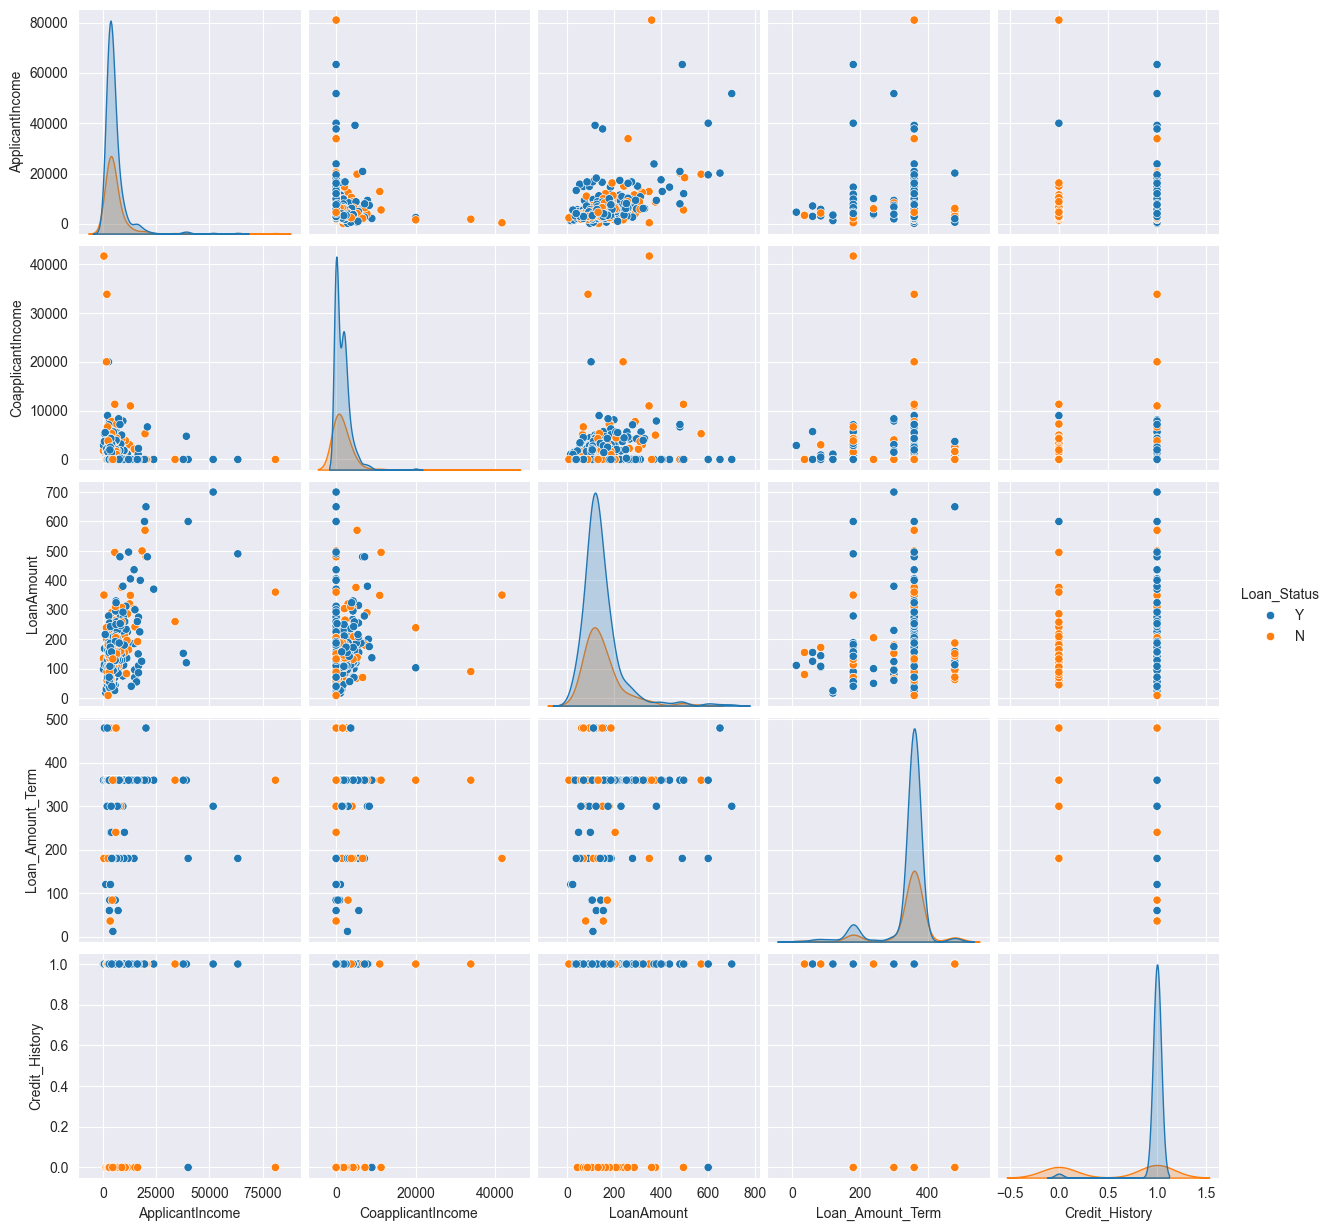

In [77]:
sns.pairplot(data=train_df, hue='Loan_Status')

In [78]:
categorical_cols = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Loan_Amount_Term', 'Credit_History']
numerical_cols = ['LoanAmount']

In [79]:
cat_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

In [80]:
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])
train_df[numerical_cols] = numerical_imputer.fit_transform(train_df[numerical_cols])

In [81]:
test_df[categorical_cols] = cat_imputer.transform(test_df[categorical_cols])
test_df[numerical_cols] = numerical_imputer.transform(test_df[numerical_cols])

In [82]:
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = test_df[column].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    label_encoders[column] = le

In [83]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1, 'N':0})
train_df = train_df.dropna(subset=['Loan_Status'])

In [84]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = train_df[features]
y = train_df['Loan_Status']

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred = model.predict(X_val)
print('Accuracy score:', accuracy_score(y_val, y_pred))
print('\nClassification Report:\n', classification_report(y_val, y_pred))

Accuracy score: 0.7642276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



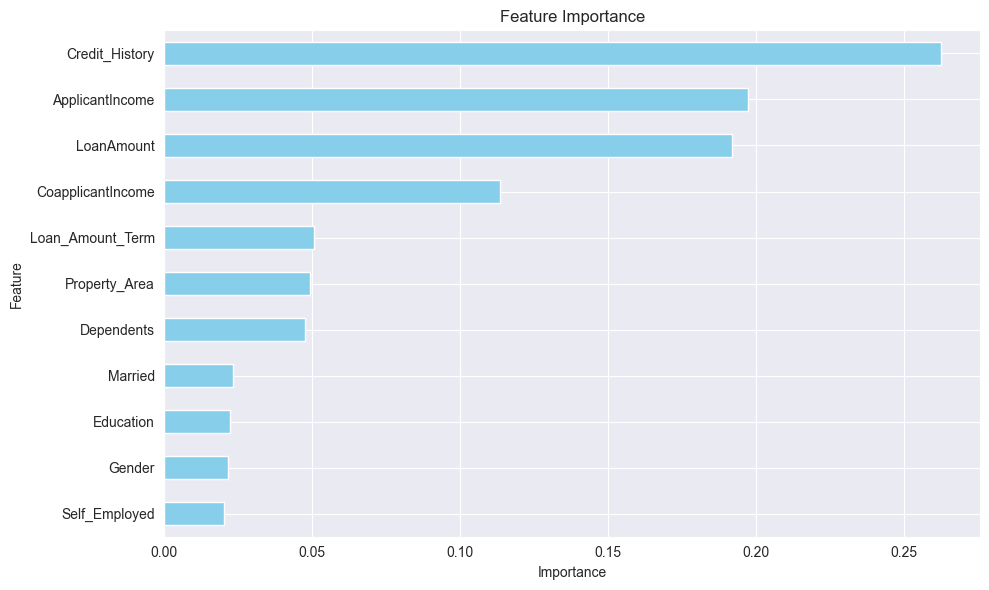

In [91]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [92]:
test_pred = model.predict(test_df[features])

In [93]:
results_df = pd.DataFrame({
    'LoanID': test_df['Loan_ID'],
    'Loan_Status_Predicted': np.where(test_pred == 1, 'Y', 'N')
})

results_df.to_csv('loan_predictions.csv', index=False)

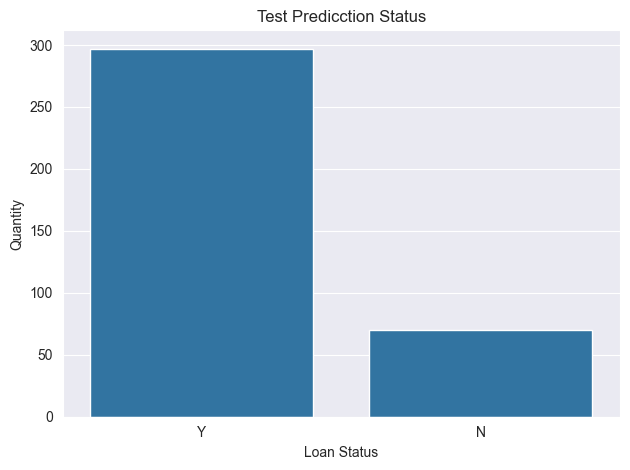

In [94]:
sns.countplot(x=results_df['Loan_Status_Predicted'])
plt.title('Test Predicction Status')
plt.xlabel('Loan Status')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

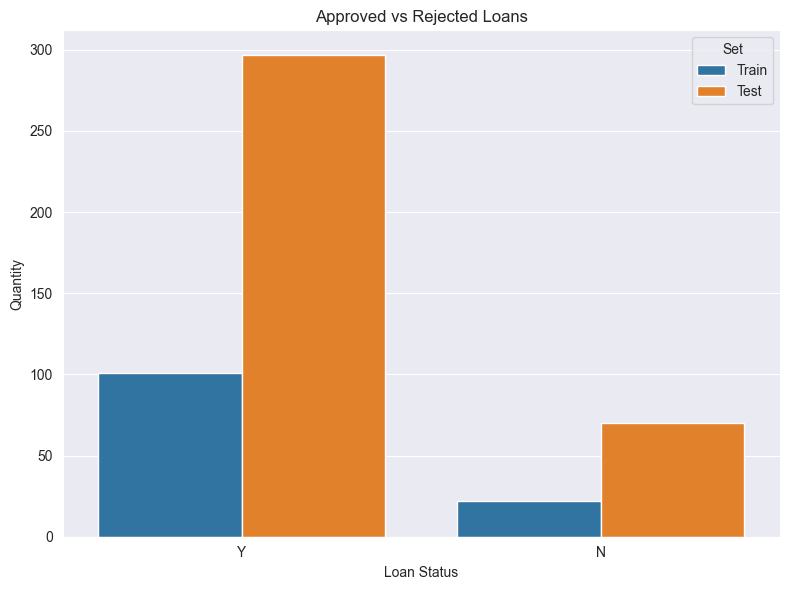

In [99]:
val_results_df = pd.DataFrame({
    'Loan_Status_Predicted': np.where(y_pred == 1, 'Y', 'N'),
    'Set': 'Train'
})

test_results_df = pd.DataFrame({
    'Loan_Status_Predicted': results_df['Loan_Status_Predicted'],
    'Set': 'Test'
})

combined_results = pd.concat([val_results_df, test_results_df])


plt.figure(figsize=(8, 6))
sns.countplot(data=combined_results, x='Loan_Status_Predicted', hue='Set')
plt.title('Approved vs Rejected Loans')
plt.xlabel('Loan Status')
plt.ylabel('Quantity')
plt.legend(title='Set')
plt.tight_layout()
plt.show()

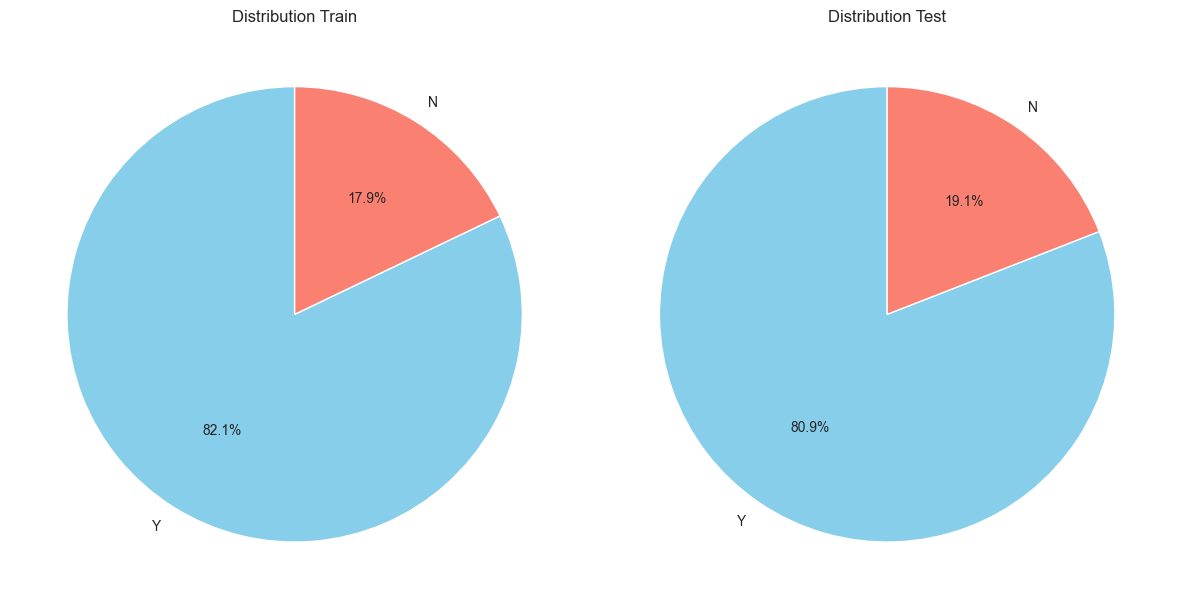

In [98]:
train_counts = val_results_df['Loan_Status_Predicted'].value_counts()
test_counts = test_results_df['Loan_Status_Predicted'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(train_counts, labels=train_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].set_title('Distribution Train')

axes[1].pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[1].set_title('Distribution Test')

plt.tight_layout()
plt.show()